### Numeric solution of the coupled HO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#### Defining some constants and initial condition

In [20]:
t = np.linspace(0,16,100)
m = 2 # masses of body 1 and 2 are the same
k1 = 10 # spring constant 1
k2 = 15 # spring constant 2
y = [0,0,2,-2] # y[0]=x1, y[1]=x2, y[2]=v1, y[3]=v2

### Defining the function to be integrated

In [21]:
def coupled_HO(t,y):
    return (y[2],y[3],-(k1+k2)*y[0] + k2*y[1], k2*y[0] - k2*y[1])

solution = solve_ivp(coupled_HO, (0,16), y0 = y, t_eval = t)

### Plotting the position

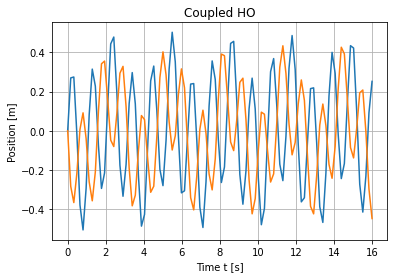

In [22]:
plt.title("Coupled HO")

plt.plot(t,solution.y[0])
plt.plot(t,solution.y[1])

plt.xlabel("Time t [s]")
plt.ylabel("Position [m]")

plt.grid()

### Plotting the velocity

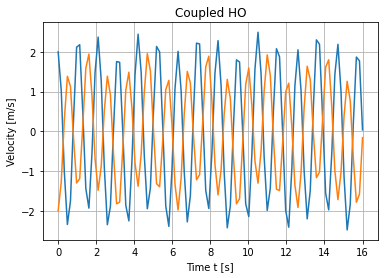

In [14]:
plt.title("Coupled HO")

plt.plot(t,solution.y[2])
plt.plot(t,solution.y[3])

plt.xlabel("Time t [s]")
plt.ylabel("Velocity [m/s]")

plt.grid()